# Lab 9: A decision tree applied to the neutrino data set
In the previous lab session you learned how to use a dataframe to analyse the neutrino data set. Single variable selections were applied on the training data and variables were sorted in order of descending value of the rejection\* efficiency metric. The goal of this week is to combine selections on multiple variables to achieve the best value possible in our metric.

As we learned in the Lab session 5, it is important to apply our selection to the "test" data set in order to check that we are not training our selections on a statistical fluctuation. For **each** question  of today's lab you should compare the value you achieve for the rejection\* efficiency on the test data set **without** preparing a new selection.

   * Expand the table you produced last week and add a column for the rejection\* efficiency using the test data set
   * Combine the selections identified last week together in groups of 2 to 6 and evaulate the maximum rejection\* efficiency that can be achieved and compare the training and the test data set results. You should try different combinations without changing the selections optimised last week. How does your best combination compare with the best result achieved last week?
   * Study correlation between the variables that you identified as "good". Prepare scatter plots for pairs of this variables and indicate if these variables are correlated 
   * For the two variables with the best discrimination identified last week, plot the value of rejection\* efficiency as a function of the selection on the two variables as a colour plot with the two variables as coordinates and the colour indicating the maximum value achieved
   * Implement a decision tree. Start with the selection with the best discrimination and define the subset of events that satisfy that selection. Then identify the selection giving the best discrimination on the subset and proceed iteratively. Plot or print the best value you achieve as a function of the number of iterations
   

In [28]:
# Last week's stuff
#Imports
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt

def GeneralListPlot(XList, YList, xlabel='X', ylabel='Y'):
    """A general function to plot 2 lists of floats, and label their axes"""
    plt.plot(XList, YList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return()

def GeneralListScatter(XList, YList, xlabel='X', ylabel='Y'):
    """A general function to plot 2 lists of floats, and label their axes"""
    plt.scatter(XList, YList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return()

signal = pd.read_csv('../data/signal_training.dat', sep = " ")
background = pd.read_csv('../data/background_training.dat', sep = " ")

sigframe = DataFrame(signal)
bacframe = DataFrame(background)
fulldatanames = list(signal.keys())
datanames = list(signal.keys())[3:]


In [2]:
# Ignore
############################################
## ~ ~ ~ ~ ~ None of this works ~ ~ ~ ~ ~ ##
############################################
# (I tried to make it a bit more efficient)
#
# def expval(nA, nAkeep, nBkeep):
#     """returns value of Eps X Rho (Efficiency * Purity)"""
# #     eff = nAkeep/nA
# #     try:                                     # Yes, we're doing this again
# #         pur = nAkeep / (nAkeep + nBkeep)
# #     except ZeroDivisionError:
# #         pur = 0
#     try:
#         val = (nAkeep ** 2)/(nA*(nAkeep + nBkeep))
#     except ZeroDivisionError:
#         val = 0
#     return(val)
#
# def fullExPcalc(frame1, frame2, datanames, dir_, quickrun = 0, debug = 0): # I had to write this twice, cos cocalc, so you'd better like it
#     """Calculates the max (Eps X Rho) values, and their cuts positions, for a pair of data frames, and outputs them as lists"""
#     # Todo: Add in a maximise function for the 'B' direction so that all the extra vars & lists aren't needed
#     expmaxlist = []
#     cutmaxlist = []
#     expmaxlistR = []
#     cutmaxlistR = []
#     expmaxlistL = []
#     cutmaxlistL = []
#     # Attempt to automate the range of the cuts. This seems to slow the program down vs just setting a sensible (but small) range, but allows for more general application
#     for datacnt in range(len(datanames)): # Produces 2 pandas series (maxima & minima)
#         cutmaxser = frame1.max(axis = 0)
#         cutminser = frame1[frame1>-999].min(axis = 0)
#
#     for i in datanames:
#         if debug == 2: # To check datanames are being read correctly
#             print(i)
#             print(datanames)
#         elif debug == 3:
#             print(i)
#         expmax = 0
#         expmaxR = 0
#         expmaxL = 0
#
#         nA = len(frame1[i])
#
#         datacnt = datanames.index(i)
#         cutmax = int(cutmaxser[datacnt]) + 1 # Avoids cutting off the actual max/min due to rounding down/up
#         cutmin = int(cutminser[datacnt]) - 1
#
#         if quickrun == 1: # Time saving option, reduces precision. Could definitely be written better, but I don't feel like working out how to get the order of a value
#             totrange = (abs(cutmax) + abs(cutmin))
#             if totrange < 10:
#                 step = 1
#             elif totrange < 100:
#                 step = int(totrange/10)
#             elif totrange < 1000: # Unneeded, but in case I feel like changing values around
#                 step = int(totrange/100)
#             elif totrange < 10000:
#                 step = int(totrange/100)
#             else:
#                 step = int(totrange/500)
#         else:
#             step = 1
#
#         def expmaxcheck(expval_, cutval, expmax_, debugin = 0):
#             """Checks whether the current value of exp is larger than the current expmax"""#
#             expmax = 0
#             if expval_ > expmax_: # Would making this a var then doing this bit be more efficient? Does it store expval(nA, nAkeep, nBkeep)?
#                 expmax = expval_
#                 cutmax = cutval
#             if debugin == 3:
#                 print('expmax: ', expmax_, 'V', expval_, 'cutmax: ', cutmax, 'V', cutval)
#             return(expmax, cutval)
#
#         for cutval in range(cutmin, cutmax, step):
#             if dir_ == 'R':
#                 nAkeep = len(frame1[frame1[i]>cutval][i])
#                 nBkeep = len(frame2[frame2[i]>cutval][i])
#                 expval_ = expval(nA, nAkeep , nBkeep)
#                 expmax, cutmax = expmaxcheck(expval_, cutval, expmax, debugin = debug)
#             elif dir_ == 'L':
#                 nAkeep = len(frame1[frame1[i]<cutval][i])
#                 nBkeep = len(frame2[frame2[i]<cutval][i])
#                 expval_ = expval(nA, nAkeep , nBkeep)
#                 expmax, cutmax = expmaxcheck(expval_, cutval, expmax, debugin = debug)
#             elif dir_ == 'B':
#                 nAkeepR = len(frame1[frame1[i]<cutval][i])
#                 nBkeepR = len(frame2[frame2[i]<cutval][i])
#                 nAkeepL = len(frame1[frame1[i]>cutval][i])
#                 nBkeepL = len(frame2[frame2[i]>cutval][i])
#                 expvalR_ = expval(nA, nAkeepR , nBkeepR)
#                 expvalL_ = expval(nA, nAkeepL , nBkeepL)
#                 expmaxR, cutmaxR = expmaxcheck(expvalR_, cutval, expmaxR, debugin = debug)
#                 expmaxL, cutmaxL = expmaxcheck(expvalL_, cutval, expmaxL, debugin = debug)
#
#             if debug == 1: # To check it's outputting correct lengths
#                 print('Dataname: ', i)
#                 print('direction: ',dir_)
#                 print('cutval: ', cutval)
#                 print('nAkeep: ',nAkeep, 'nBkeep: ', nBkeep, 'nA: ', nA)
#                 print('Metric: ', expval(nA, nAkeep, nBkeep))
#         if dir_ == 'B':
#             cutmaxlistR.append(cutmaxR)
#             expmaxlistR.append(expmaxR)
#             cutmaxlistL.append(cutmaxL)
#             expmaxlistL.append(expmaxL)
#         else:
#             cutmaxlist.append(cutmax)
#             expmaxlist.append(expmax)
#
#     if dir_ == 'B':
#         return(expmaxlistR, cutmaxlistR, expmaxlistL, cutmaxlistL)
#     else:
#         return(expmaxlist, cutmaxlist)
#
#
#
#
# maxlistR, cutlistR, maxlistL, cutlistL = fullExPcalc(sigframe, bacframe, fulldatanames, 'B', quickrun = 1, debug = 0)
#
# # print(len(maxlistR), len(cutlistR), len(maxlistL), len(cutlistL))
#
# maxlistF, cutlistF = [],[]
# for i in range (0,len(maxlistR)):
#     if maxlistR[i] >= maxlistL[i]:
#         maxlistF.append(maxlistR[i])
#         cutlistF.append(cutlistR[i])
#     elif maxlistL[i] > maxlistR[i]:
#         maxlistF.append(maxlistL[i])
#         cutlistF.append(cutlistL[i])
#
# newmaxlistF = maxlistF[3:]
# newcutlistF = cutlistF[3:]

In [3]:
############################################
## TBF This Stuff Probably Doesn't Either ##
############################################

def expval(nA, nAkeep, nBkeep):
    """returns value of Eps X Rho (Efficiency * Purity)"""
    eff = nAkeep/nA
    try:                                     # Yes, we're doing this again
        pur = nAkeep / (nAkeep + nBkeep)
    except ZeroDivisionError:
        pur = 0
    return(eff*pur)

def fullExPcalc(frame1, frame2, datanames, dir_, quickrun = 0, debug = 0): # I had to write this twice, cos cocalc, so you'd better like it
    """Calculates the max (Eps X Rho) values, and their cuts positions, for a pair of data frames, and outputs them as lists"""
    expmaxlist = []
    cutmaxlist = []
#     dirlist = []
    # Attempt to automate the range of the cuts. This seems to slow the program down vs just setting a sensible (but small) range, but allows for more general application
    for datacnt in range(len(datanames)): # Produces 2 pandas series (maxima & minima)
        cutmaxser = frame1.max(axis = 0)
        cutminser = frame1[frame1>-999].min(axis = 0)

    for i in datanames:
        if debug == 2: # To check datanames are being read correctly
            print(i)
            print(datanames)
        elif debug == 3:
            print(i)
        expmax = 0
        nA = len(frame1[i])

        datacnt = datanames.index(i)
        cutmax = int(cutmaxser[datacnt]) + 1 # Avoids cutting off the actual max/min due to rounding down/up
        cutmin = int(cutminser[datacnt]) - 1
        if quickrun == 1: # Time saving option, reduces precision. Could definitely be written better, but I don't feel like working out how to get the order of a value
            totrange = (abs(cutmax) + abs(cutmin))
            if totrange < 10:
                step = 1
            elif totrange < 100:
                step = int(totrange/10)
            elif totrange < 1000:
                step = int(totrange/100)
            elif totrange < 10000:
                step = int(totrange/100)
            else:
                step = int(totrange/500)
        else:
            step = 1

        for cutval in range(cutmin, cutmax, step):
            if dir_ == 'R':
                nAkeep = len(frame1[frame1[i]>cutval][i])
                nBkeep = len(frame2[frame2[i]>cutval][i])
            elif dir_ == 'L':
                nAkeep = len(frame1[frame1[i]<cutval][i])
                nBkeep = len(frame2[frame2[i]<cutval][i])
            else:
                "Invalid direction, use 'R' or 'L'"

            expval_ = expval(nA, nAkeep, nBkeep)

            if expval_ > expmax: # Would making this a var then doing this bit be more efficient? Does it store expval(nA, nAkeep, nBkeep)?
                expmax = expval_
                cutmax = cutval
                if debug == 3:
                    print('expmax: ', expmax, 'V', expval_, 'cutmax: ', cutmax, 'V', cutval)

            if debug == 1: # To check it's outputting correct lengths
                print('Dataname: ', i)
                print('direction: ',dir_)
                print('cutval: ', cutval)
                print('nAkeep: ',nAkeep, 'nBkeep: ', nBkeep, 'nA: ', nA)
                print('Metric: ', expval(nA, nAkeep, nBkeep))

        cutmaxlist.append(cutmax)
        expmaxlist.append(expmax)
#         dirlist.append(dir_)
    return(expmaxlist, cutmaxlist)

# Changing quickrun to 0 will give more precise results, but takes ages to run (I haven't managed to get it to complete yet)
maxlistR, cutlistR = fullExPcalc(sigframe, bacframe, fulldatanames, 'R', quickrun = 1, debug = 0)
maxlistL, cutlistL = fullExPcalc(sigframe, bacframe, fulldatanames, 'L', quickrun = 1, debug = 0)

# Comparing left and right cut values, taking the best. This could probably do with being a function.
maxlistF, cutlistF, dirlistF = [],[],[]
for i in range (0,len(maxlistR)):
    if maxlistR[i] > maxlistL[i]:
        maxlistF.append(maxlistR[i])
        cutlistF.append(cutlistR[i])
        dirlistF.append('>')
    elif maxlistL[i] > maxlistR[i]:
        maxlistF.append(maxlistL[i])
        cutlistF.append(cutlistL[i])
        dirlistF.append('<')

# Cropping off the first 3 columns (I'm assuming this is wanted)
newmaxlistF = maxlistF[3:]
newcutlistF = cutlistF[3:]
newdirlistF = dirlistF[3:]

In [5]:
# Expand the table you produced last week and add a column for the rejection* efficiency using the test data set
def testdata(frame1, frame2, cutvallist, datanames):
    testexpvallist = []
    for i in datanames:
        cutval = cutvallist[datanames.index(i)]
        nA = len(frame1[i])
        nAkeepR = len(frame1[frame1[i]>cutval][i])
        nBkeepR = len(frame2[frame2[i]>cutval][i])
        nAkeepL = len(frame1[frame1[i]<cutval][i])
        nBkeepL = len(frame2[frame2[i]<cutval][i])
        expvalR_ = expval(nA, nAkeepR, nBkeepR)
        expvalL_ = expval(nA, nAkeepL, nBkeepL)
        if expvalR_ >= expvalL_:
            testexpvallist.append(expvalR_)
        else:
            testexpvallist.append(expvalL_)
    return(testexpvallist)

signaltest = pd.read_csv('../data/signal_data.dat', sep = " ")
backgroundtest = pd.read_csv('../data/background_data.dat', sep = " ")

sigframetest = DataFrame(signaltest)
bacframetest = DataFrame(backgroundtest)

# print(len(cutlistF))
# print(len(fulldatanames))
testexplist = testdata(sigframetest, bacframetest, cutlistF, fulldatanames)
newtestlist = testexplist[3:]

# Dictionary things:
P, I, G = 'Poor', 'Intermediate', 'Good'
discr = [I, P, P, I, P, P, P, P, P, P, I, G, G, P, I, P, G, G, I]
tabledata = {'Variable': datanames, 'Max (Eps X Rho)': newmaxlistF, 'Best cut': newcutlistF, 'Cut Direction': newdirlistF, 'Discriminator': discr, 'Test Data EXR': newtestlist}
tableframe = DataFrame(tabledata)

display(tableframe)
# The values this produces are wrong, I can't work out why. It appears that values that should be 0.5 come out as a little bit below.

,Variable,Max (Eps X Rho),Best cut,Cut Direction,Discriminator,Test Data EXR
0,muonmom,0.499925,10183,<,Intermediate,0.494949
1,muoncos,0.481033,-1,>,Poor,0.479480
2,muonpull,0.497251,3,<,Poor,0.492195
3,ntracks,0.578387,0,>,Intermediate,0.555651
4,negpionmom,0.499950,3193,<,Poor,0.494949
5,pospions,0.500000,-1,>,Poor,0.494949
6,pospionmom,0.499850,100050,<,Poor,0.494949
7,pospiontheta,0.499925,2,<,Poor,0.494974
8,pospionz,0.499925,749,<,Poor,0.494949
9,pi0elpull,0.461964,1,<,Poor,0.462388


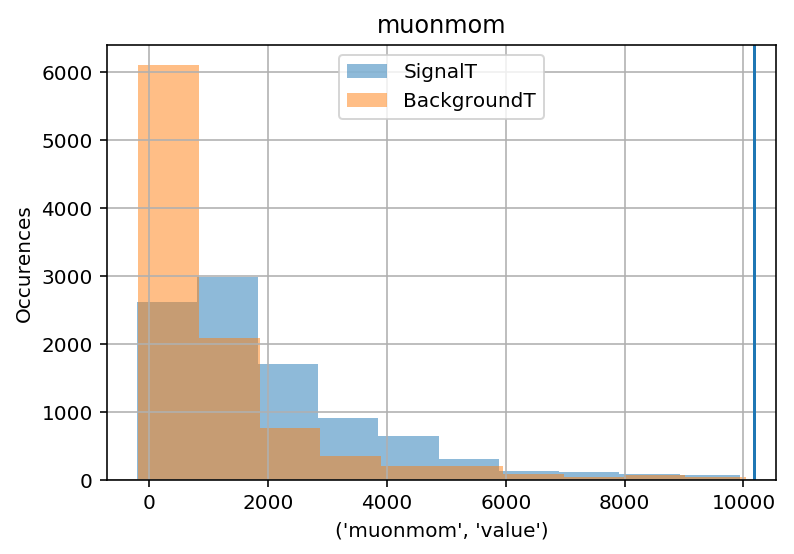

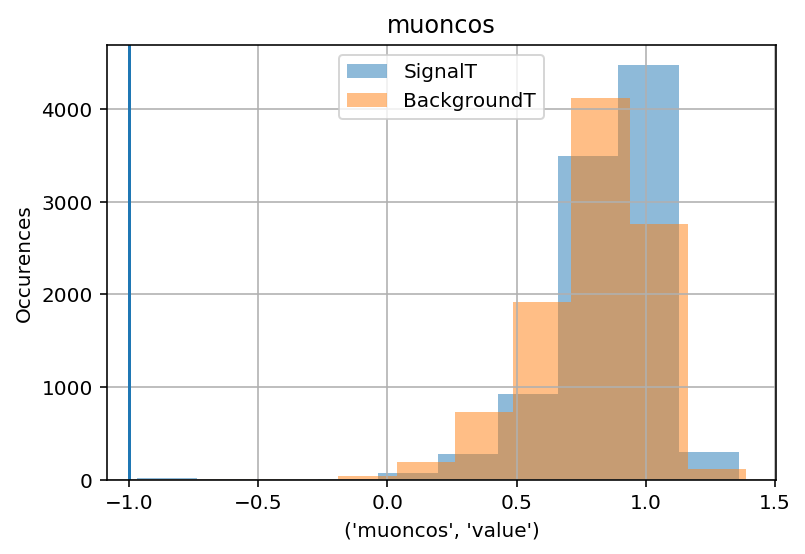

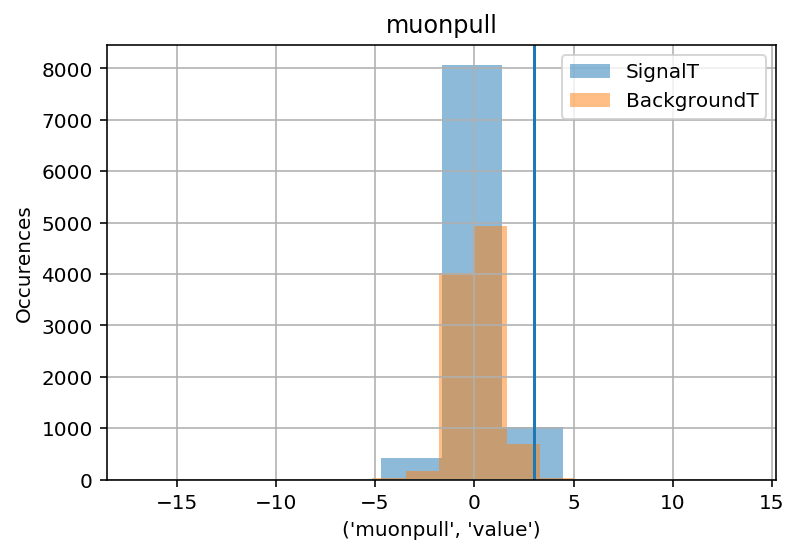

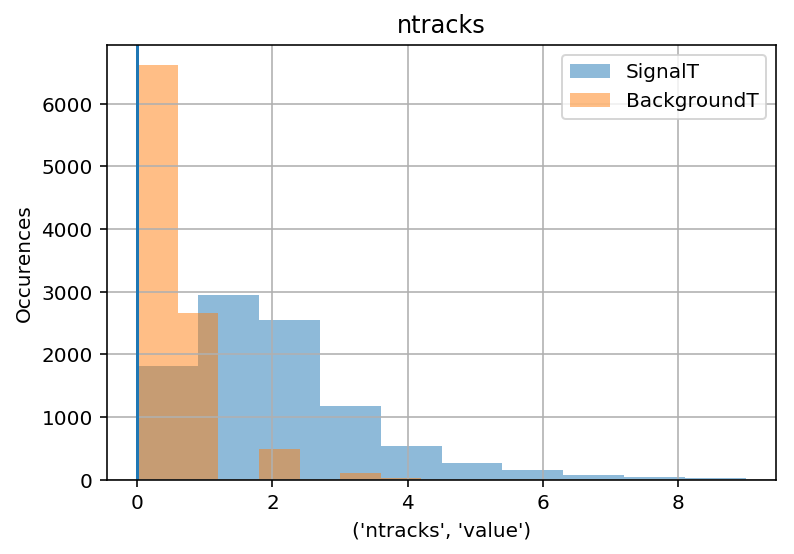

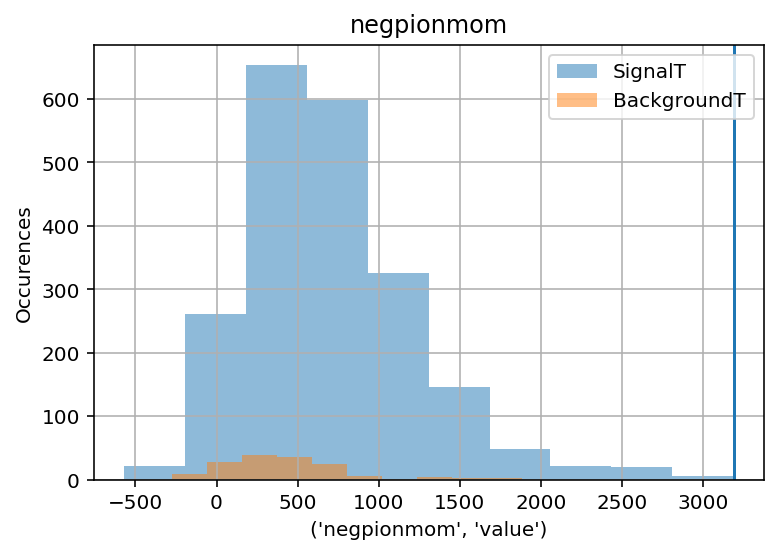

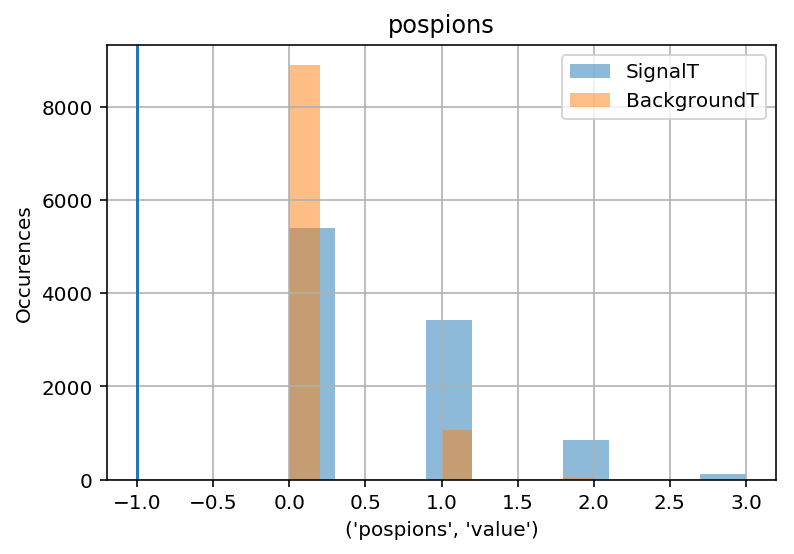

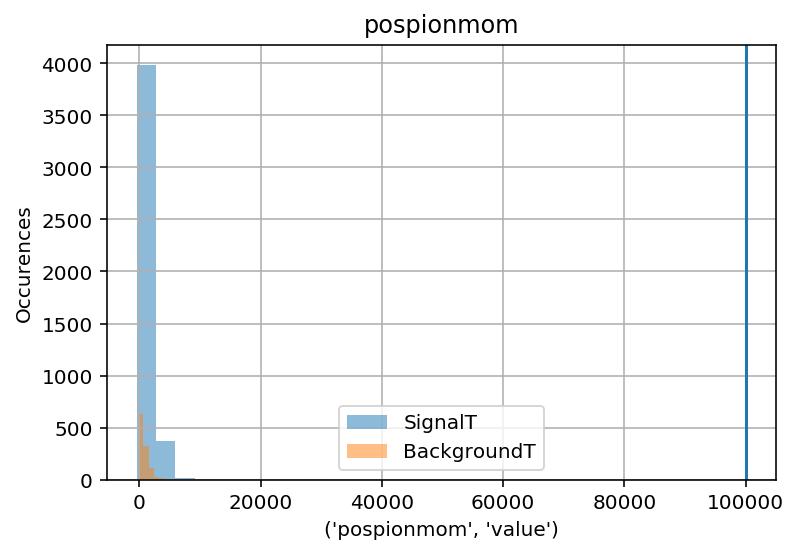

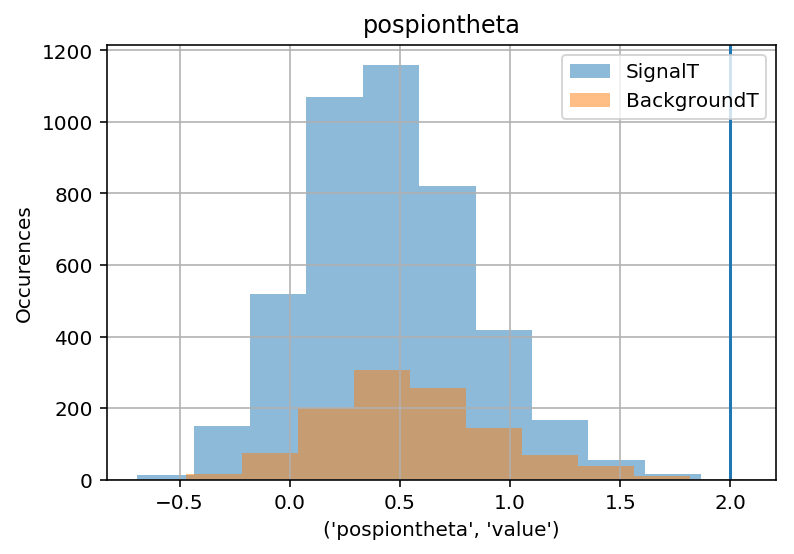

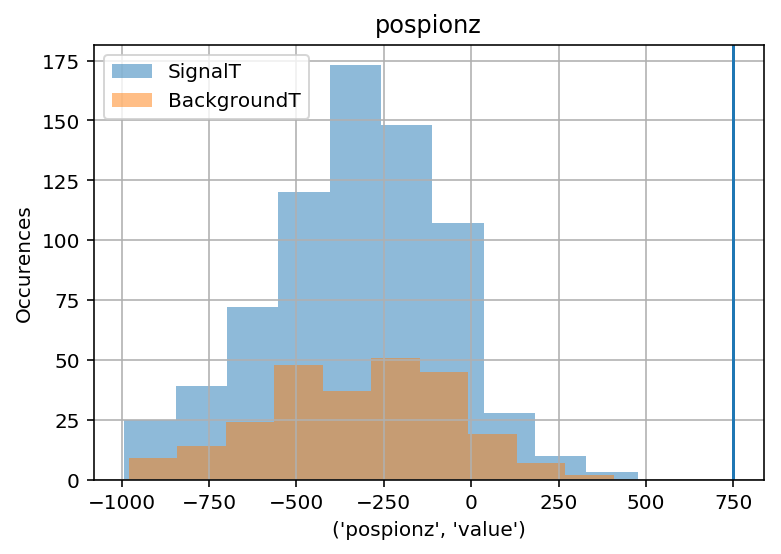

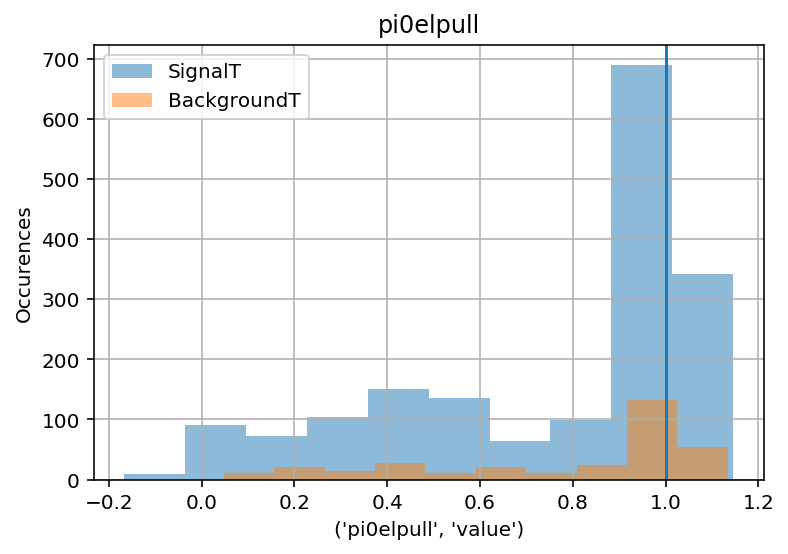

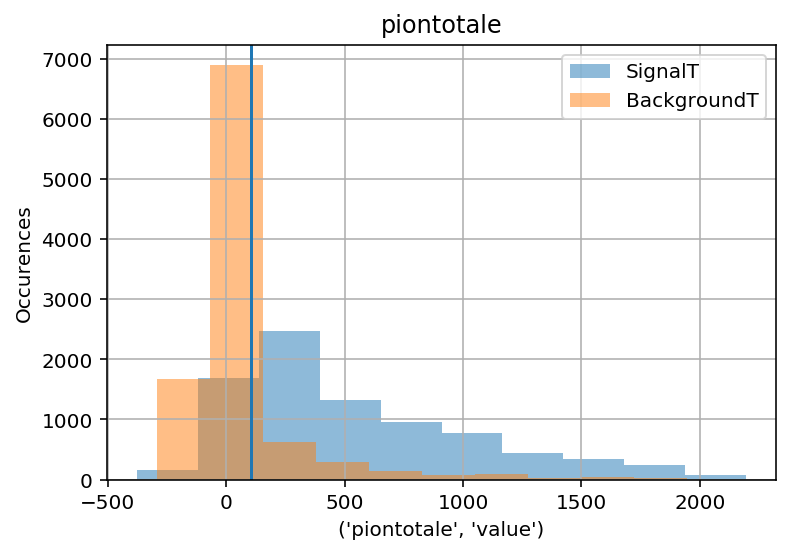

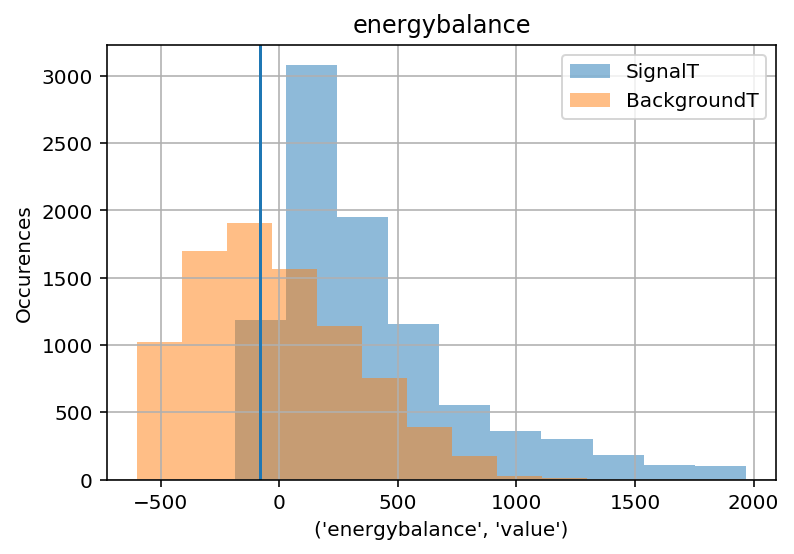

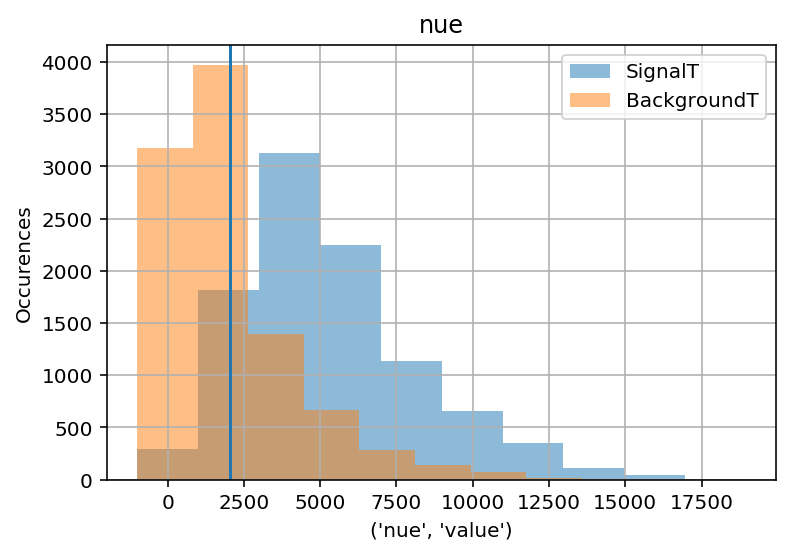

In [21]:
# # Just a some histograms to show where the cut lines are

# for i in datanames:
# #     sigframe[sigframe[i]>-999.].loc[:,i].hist(alpha = 0.5, label = 'Signal')
# #     bacframe[bacframe[i]>-999.].loc[:,i].hist(alpha = 0.5, label = 'Background')
#     sigframetest[sigframetest[i]>-999.].loc[:,i].hist(alpha = 0.5, label = 'SignalT')
#     bacframetest[bacframetest[i]>-999.].loc[:,i].hist(alpha = 0.5, label = 'BackgroundT')
#     plt.axvline(newcutlistF[datanames.index(i)])
#     plt.title(i)
#     plt.xlabel((i, 'value')) # This is close enough for now
#     plt.ylabel('Occurences')
#     plt.legend()
#     plt.show()

ValueError: setting an array element with a sequence.

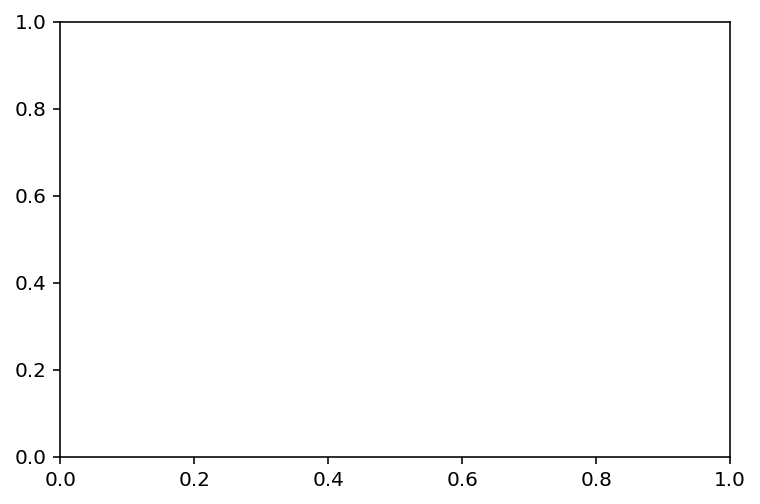

In [34]:
# Combine the selections identified last week together in groups of 2 to 6 and evaulate the maximum rejection* efficiency that can be achieved and compare the training and the test data set results.
# You should try different combinations without changing the selections optimised last week. How does your best combination compare with the best result achieved last week?

# Genuinely having trouble working out what this exercise even wants

# Multiple cuts, e.g. for data where both piontale > cut & nue > cut
# Useful data (optimum cut doesn't select all data): piontotale, energybalance, nue, effpullx, effpully, efftime

# def pullcut(datanm, cutlist=newcutlistF, datanamelist = datanames):
#     """Returns the value of the optimum cut for a given variable"""
#     cutval = cutlist[datanamelist.index(datanm)]
#     return(cutval)

# It appears we can't just run the frame through 2 logic statements, that just throws errors, so we'll try this:
def multicut(datanms, testdata, datalist = datanames, cutlist = newcutlistF, dirlist = newdirlistF):
    """Carries out muliple cuts on data. Requires the data names given in a list"""
    testdatarr = []
    ERlist = []
    for datanm in datanms:
        cut, dir_ = cutfind(datanm)
        ER = ERfind(datanm)
        datacolumn = testdata.loc[:, datanm]
        if dir_ == '>':
            columntemp = datacolumn[datacolumn>cut]
        elif dir_ == '<':
            columntemp = datacolumn[datacolumn<cut]
        testdatarr.append(columntemp)
        ERlist.append(ER)
    return(testdatarr, ERlist)

# def multicut2(datanm, testdata, datalist = datanames, cutlist = newcutlistF, dirlist = newdirlistF):
#     cut, dir_ = cutfind(datanm)
#     ER = ERfind(datanm)
#     datacolumn = testdata.loc[:, datanm]
#     if dir_ == '>':
#         columntemp = datacolumn[datacolumn>cut]
#     elif dir_ == '<':
#         columntemp = datacolumn[datacolumn<cut]
#     return(columntemp)

def cutfind(datanm, datalist = datanames ,cutlist = newcutlistF, dirlist = newdirlistF):
    """Gives the value of the optimal cut for a given dataname"""
    ind_ = datalist.index(datanm)
    cutval = cutlist[ind_]
    dir_ = dirlist[ind_]
    return(cutval, dir_)

def ERfind(datanm, ERlist = newmaxlistF, datalist = datanames):
    """Gives the value of the (E*R) metric for a given dataname"""
    ind_ = datalist.index(datanm)
    ER = newmaxlistF[ind_]
    return(ER)
    
# I've been told not to do every combination, and only do a couple
datanms1 = ['piontotale', 'energybalance']
datanms2 = ['nue', 'effpullx']
datanms3= ['piontotale', 'energybalance', 'nue', 'effpullx', 'effpully', 'efftime']

set1, ER1 = multicut(datanms1, sigframetest)
set2, ER2 = multicut(datanms2, sigframetest)
set3, ER3  = multicut(datanms3, sigframetest)

GeneralListScatter(set1, ER1) # ValueError: setting an array element with a sequence. --Output the lists separately?
GeneralListScatter(set2, ER2)
GeneralListScatter(set3, ER3)

# I have no idea how to make this work. Dataframes man...

In [0]:
# Study correlation between the variables that you identified as "good". Prepare scatter plots for pairs of this variables and indicate if these variables are correlated

In [0]:
# For the two variables with the best discrimination identified last week, plot the value of rejection* efficiency as a function of the selection on the two variables as a colour plot with the two variables as coordinates and the colour indicating the maximum value achieved

In [0]:
# Implement a decision tree. Start with the selection with the best discrimination and define the subset of events that satisfy that selection. Then identify the selection giving the best discrimination on the subset and proceed iteratively. Plot or print the best value you achieve as a function of the number of iterations
#
# I don't even know what a decision tree is, nevermind how to implement one